In [1]:
import numpy as np, healpy as hp, pickle, prjlib, curvedsky, plottools as pl
from matplotlib.pyplot import *

In [2]:
def view_map(alm,nside,lmax,min=-.1,max=.1):
    Map = curvedsky.utils.hp_alm2map(12*nside**2,lmax,lmax,alm[:lmax+1,:lmax+1])
    hp.mollview(Map,min=min,max=max)

In [3]:
Lmax, lmax = 4096, 2048
l = np.linspace(0,lmax,lmax+1)
L = np.linspace(0,Lmax,Lmax+1)
pla = prjlib.analysis_init(t='la',freq='coadd',lmax=Lmax)
pid = prjlib.analysis_init(t='id')
psa = prjlib.analysis_init(t='sa',freq='coadd',lmax=lmax)
pco = prjlib.analysis_init(t='co',freq='coadd',lmax=lmax)
vmin, vmax = -3e-6, 3e-6

In [4]:
# load windows
__, Msa, __ = prjlib.window('sa',psa.nside)
__, Mla, wnla = prjlib.window('la',psa.nside)
mco2 = np.average(Mla)+np.average(Msa)-np.average(Mla*Msa)
print(wnla[0],mco2)

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
fsky and normalization corrections: [0.34380341 0.08167021 0.0396735  0.02447694 0.01720146]
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
fsky and normalization corrections: [0.5752538  0.14110665 0.04651988 0.01847941 0.008786  ]
0.5752538045247396 0.577020009358724


Filtered maps

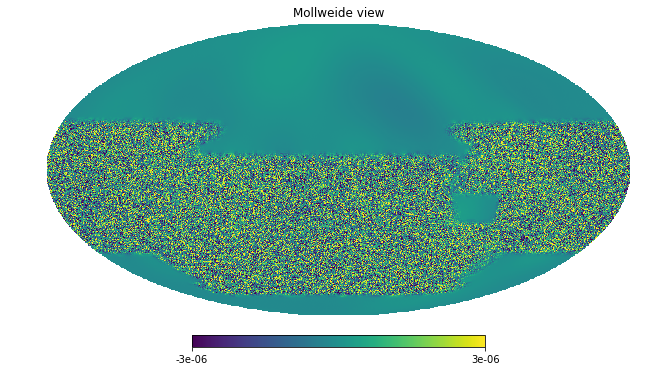

In [5]:
cEalm = pickle.load(open(pco.fcmb.alms['w']['E'][1],"rb"))[:lmax+1,:lmax+1]
cBalm = pickle.load(open(pco.fcmb.alms['w']['B'][1],"rb"))[:lmax+1,:lmax+1]
view_map(cEalm,psa.nside,lmax,min=vmin,max=vmax)

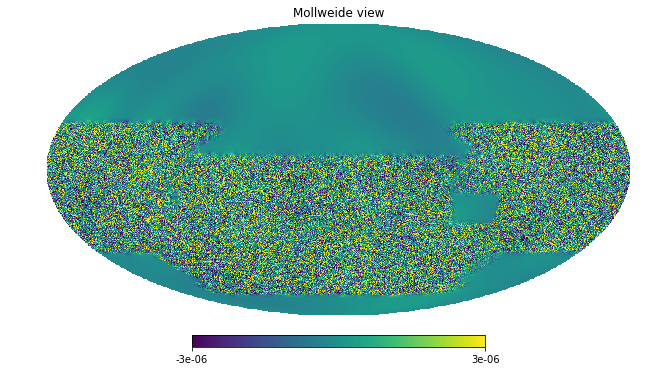

In [6]:
wEalm = pickle.load(open(pla.fcmb.alms['w']['E'][1],"rb"))[:lmax+1,:lmax+1]
wBalm = pickle.load(open(pla.fcmb.alms['w']['B'][1],"rb"))[:lmax+1,:lmax+1]
view_map(wEalm,psa.nside,lmax,min=vmin,max=vmax)

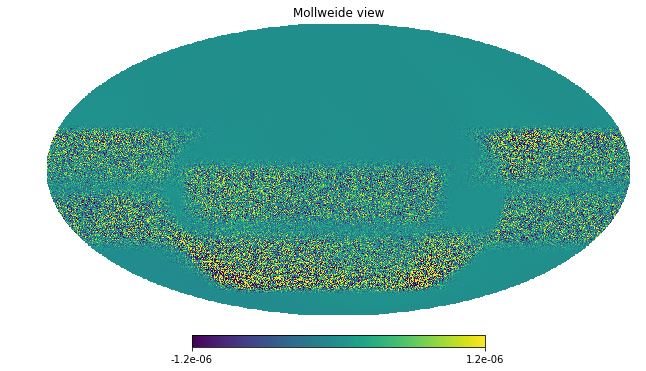

In [7]:
WEalm = pickle.load(open(pla.fcmb.alms['W']['E'][1],"rb"))[:lmax+1,:lmax+1]
WBalm = pickle.load(open(pla.fcmb.alms['W']['B'][1],"rb"))[:lmax+1,:lmax+1]
view_map(WEalm,psa.nside,lmax,min=vmin*.4,max=vmax*.4)

In [8]:
iEalm = pickle.load(open(pid.fcmb.alms['o']['E'][1],"rb"))[:lmax+1,:lmax+1]
iBalm = pickle.load(open(pid.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1]

Power spectrum

In [9]:
TT, EE, BB = np.loadtxt(pla.fcmb.scl['s'],unpack=True,usecols=(1,2,3))[:,:Lmax+1]
TN, EN, BN = np.loadtxt(pla.fcmb.scl['n'],unpack=True,usecols=(1,2,3))[:,:Lmax+1]
WT = TT/(TT+TN+1e-30)
WE = EE/(EE+EN+1e-30)
WB = BB/(BB+BN+1e-30)

In [10]:
cEE = curvedsky.utils.alm2cl(lmax,cEalm)/mco2
wEE = curvedsky.utils.alm2cl(lmax,wEalm)/wnla[0]
WEE = curvedsky.utils.alm2cl(lmax,WEalm)/wnla[2]
cBB = curvedsky.utils.alm2cl(lmax,cBalm)/mco2
wBB = curvedsky.utils.alm2cl(lmax,wBalm)/wnla[0]
WBB = curvedsky.utils.alm2cl(lmax,WBalm)/wnla[2]

In [11]:
xEE = curvedsky.utils.alm2cl(lmax,wEalm,iEalm)/wnla[0]
xBB = curvedsky.utils.alm2cl(lmax,wBalm,iBalm)/wnla[0]

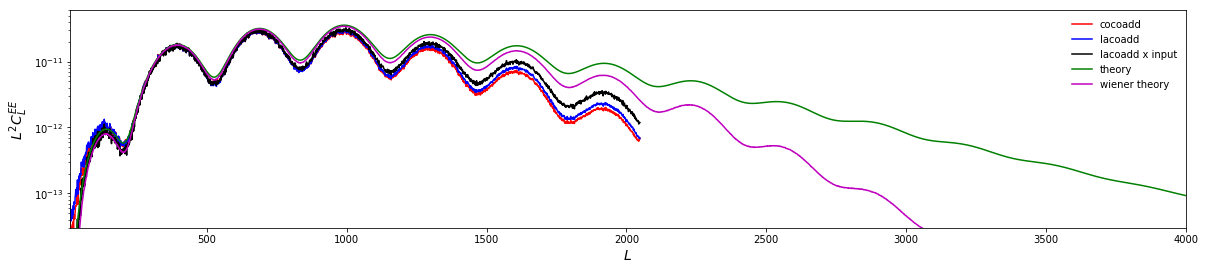

In [12]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-14,ymax=6e-11,ylog=True,ylab=r'$L^2C_L^{EE}$')
plot(l,l**2*cEE,color='r',label='cocoadd')
plot(l,l**2*wEE,color='b',label='lacoadd')
plot(l,l**2*xEE,color='k',label='lacoadd x input')
plot(L,L**2*pla.lEE,color='g',label='theory')
plot(L,L**2*WE*EE,color='m',label='wiener theory')
legend()

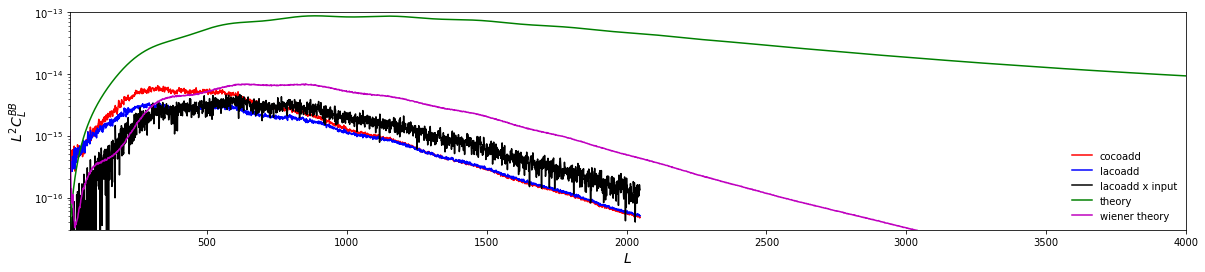

In [13]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-17,ymax=1e-13,ylog=True,ylab=r'$L^2C_L^{BB}$')
plot(l,l**2*cBB,color='r',label='cocoadd')
plot(l,l**2*wBB,color='b',label='lacoadd')
plot(l,l**2*xBB,color='k',label='lacoadd x input')
plot(L,L**2*pla.lBB,color='g',label='theory')
plot(L,L**2*WB*BB,color='m',label='wiener theory')
legend()